In [89]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras

In [90]:
import kagglehub

# Download the dataset
path = kagglehub.dataset_download("preritbhagat/stress-non-stress-images")

print("Path to dataset files:", path)

Path to dataset files: /Users/tongluyangyu/.cache/kagglehub/datasets/preritbhagat/stress-non-stress-images/versions/1


In [91]:
import os
current_path = os.getcwd()
print("Current path:", current_path)

# Importing the dataset
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    './KDEF/KDEF/Train',
    shuffle=True,
    batch_size=32,
)

print(len(dataset))

Current path: /Users/tongluyangyu/Documents/GitHub/Final-project-of-introduction-to-machine-learning
Found 4409 files belonging to 2 classes.
138


In [92]:
# Two types of images in the dataset
class_titles = dataset.class_names
class_titles

['NoStress', 'Stress']

2025-01-21 23:21:45.973909: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


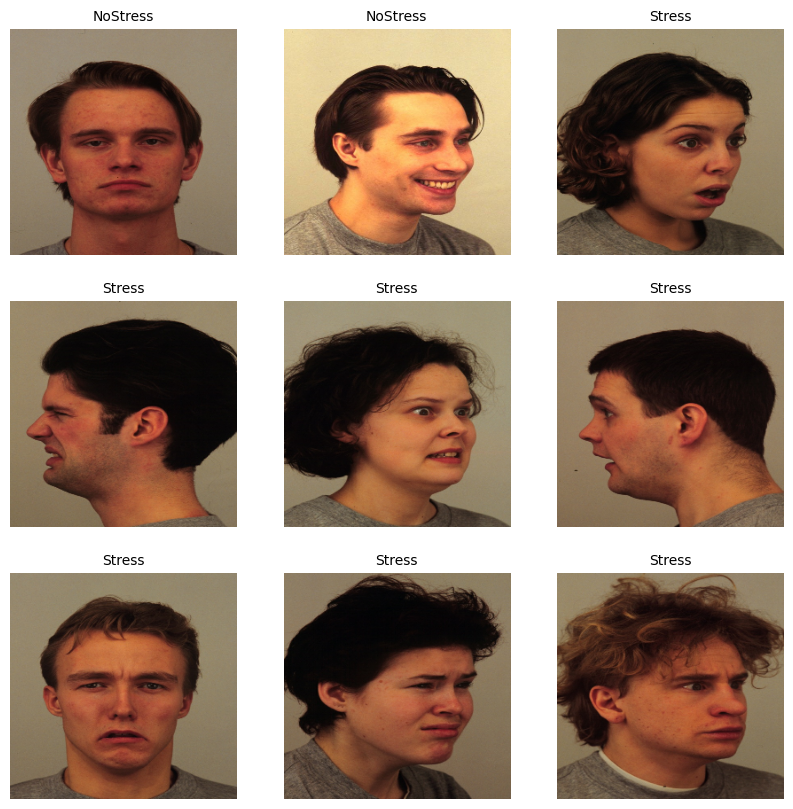

In [93]:
# Displaying some images
plt.figure(figsize=(10, 10))

for image, label in dataset.take(1): # take(1) takes the first batch of 32 images
    labels = label.numpy()
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(image[i].numpy().astype("uint8"))
        plt.title(class_titles[labels[i]], fontsize=10)
        plt.axis("off")

In [106]:
# Build up the CNN model
model = tf.keras.Sequential([
    # Preprocessing layer
    tf.keras.layers.Resizing(256, 256),
    tf.keras.layers.Rescaling(1./255),

    # Convolutional layers and pooling layers
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 256, 256, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    # Dense layers
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5), # Dropout layer to prevent overfitting
    tf.keras.layers.Dense(2, activation='softmax')
])

model.build((32, 256, 256, 3))

model.summary()

/opt/anaconda3/envs/pytorch/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resizing_18 (Resizing)          │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_17 (Rescaling)        │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_51 (Conv2D)              │ (32, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_51 (MaxPooling2D) │ (32, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_52 (Conv2D)              │ (32, 125, 125, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_52 (MaxPooling2D) │ (32, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_53 (Conv2D)              │ (32, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_53 (MaxPooling2D) │ (32, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_17 (Flatten)            │ (32, 57600)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (32, 64)               │     3,686,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (32, 64)               │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (32, 2)                │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,742,914 (14.28 MB)

 Trainable params: 3,742,914 (14.28 MB)

 Non-trainable params: 0 (0.00 B)

In [105]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    dataset,
    batch_size = 32,
    verbose = 1,
    epochs = 10
)

Epoch 1/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 61s 438ms/step - accuracy: 0.9602 - loss: 0.1047
Epoch 2/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 67s 485ms/step - accuracy: 0.9664 - loss: 0.0857
Epoch 3/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 69s 499ms/step - accuracy: 0.9736 - loss: 0.0627
Epoch 4/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 74s 536ms/step - accuracy: 0.9694 - loss: 0.0769
Epoch 5/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 79s 572ms/step - accuracy: 0.9736 - loss: 0.0637
Epoch 6/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 72s 520ms/step - accuracy: 0.9782 - loss: 0.0575
Epoch 7/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 77s 557ms/step - accuracy: 0.9837 - loss: 0.0446
Epoch 8/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 78s 566ms/step - accuracy: 0.9809 - loss: 0.0465
Epoch 9/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 74s 538ms/step - accuracy: 0.9874 - loss: 0.0349
Epoch 10/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 77s 556ms/step - accuracy: 0.9841 - loss: 0.0396


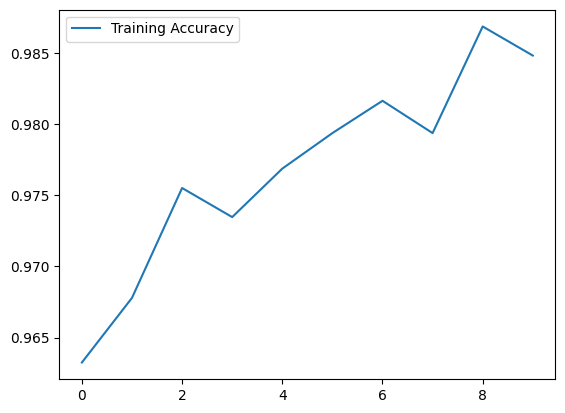

In [107]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.legend()
plt.show()

In [96]:
# import the test dataset
dataset_test = tf.keras.preprocessing.image_dataset_from_directory(
    './KDEF/KDEF/Test',
    shuffle=True,
    batch_size=32,
)

# Evaluate the model
test_loss, test_acc = model.evaluate(dataset_test)
print(f'The test accuracy is: {test_acc} and the test loss is: {test_loss}')

Found 1891 files belonging to 2 classes.
60/60 ━━━━━━━━━━━━━━━━━━━━ 9s 155ms/step - accuracy: 0.9021 - loss: 0.2475
The test accuracy is: 0.8952934741973877 and the test loss is: 0.27525264024734497


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


2025-01-21 23:32:57.343843: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


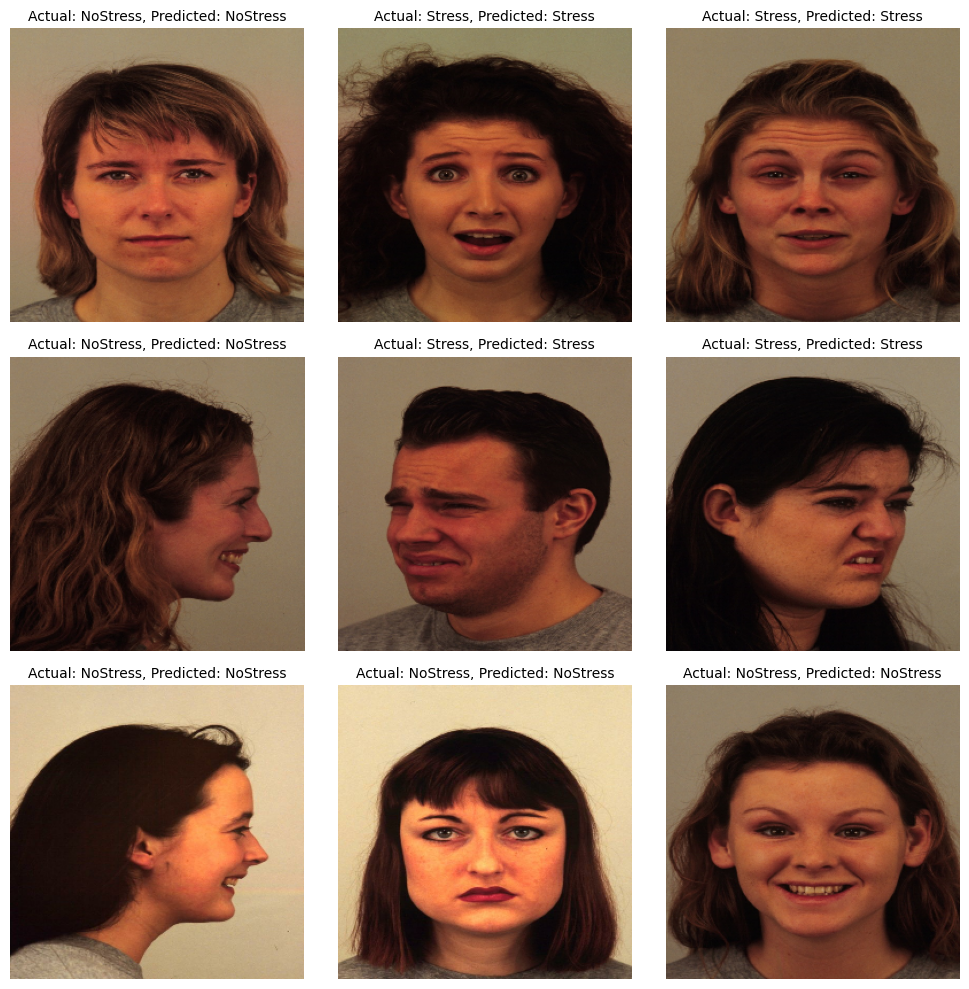

In [97]:
# Visualize the predicted types vs actual types
plt.figure(figsize=(10, 10))

prediction_dataset = dataset_test.skip(5).take(1)

for image, label in prediction_dataset:
    labels = label.numpy()
    predictions = model.predict(image)

    batch_size = image.shape[0]
    for i in range(min(batch_size, 9)):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(image[i].numpy().astype("uint8"))
        predicted_label = np.argmax(predictions[i])
        actual_label = labels[i]
        plt.title(f'Actual: {class_titles[actual_label]}, Predicted: {class_titles[predicted_label]}', fontsize=10)
        plt.axis("off")

plt.tight_layout()
plt.show()


In [98]:
# Try to combine the transformer model with the CNN model
# Build the transformer model
# Transformer Encoder Block
class TransformerBlock(tf.keras.layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = tf.keras.layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = tf.keras.Sequential([
            tf.keras.layers.Dense(ff_dim, activation="relu"),
            tf.keras.layers.Dense(embed_dim),
        ])
        self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = tf.keras.layers.Dropout(rate)
        self.dropout2 = tf.keras.layers.Dropout(rate)

    def call(self, inputs, training=None):  # Ensure `training` is passed
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

In [99]:
# Combine CNN and Transformer
def build_combined_model(input_shape=(256, 256, 3), num_classes=2):
    inputs = tf.keras.Input(shape=input_shape)

    # Step 1: CNN Feature Extraction
    x = tf.keras.layers.Resizing(256, 256)(inputs)
    x = tf.keras.layers.Rescaling(1./255)(x)
    x = tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu')(x)
    x = tf.keras.layers.MaxPooling2D((2, 2))(x)
    x = tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu')(x)
    x = tf.keras.layers.MaxPooling2D((2, 2))(x)
    x = tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu')(x)
    x = tf.keras.layers.MaxPooling2D((2, 2))(x)
    x = tf.keras.layers.Flatten()(x)

    # Step 2: Transformer Encoder
    x = tf.keras.layers.Dense(128, activation='relu')(x)  # Embedding
    x = tf.keras.layers.Reshape((1, 128))(x)  # Ensure shape is [batch_size, seq_len, embed_dim]
    transformer_block = TransformerBlock(embed_dim=128, num_heads=4, ff_dim=512)
    x = transformer_block(x)

    # Step 3: Classification
    x = tf.keras.layers.GlobalAveragePooling1D()(x)  # Reduce sequence dimension
    x = tf.keras.layers.Dropout(0.5)(x)
    outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    return model


# Build and compile the model
combined_model = build_combined_model()
combined_model.compile(optimizer='adam',
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

combined_model.summary()

Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_19 (InputLayer)     │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resizing_17 (Resizing)          │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_16 (Rescaling)        │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_48 (Conv2D)              │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_48 (MaxPooling2D) │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_49 (Conv2D)              │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_49 (MaxPooling2D) │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_50 (Conv2D)              │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_50 (MaxPooling2D) │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_16 (Flatten)            │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_7 (Reshape)             │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ transformer_block_7             │ (None, 1, 128)         │       396,032 │
│ (TransformerBlock)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_3      │ (None, 128)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,235,266 (58.12 MB)

 Trainable params: 15,235,266 (58.12 MB)

 Non-trainable params: 0 (0.00 B)

In [100]:
history = combined_model.fit(
    dataset,
    epochs=10,
    batch_size=32,
    verbose=1
)

Epoch 1/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 88s 630ms/step - accuracy: 0.5127 - loss: 0.9866
Epoch 2/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 353s 3s/step - accuracy: 0.5163 - loss: 0.7141
Epoch 3/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 987s 7s/step - accuracy: 0.5136 - loss: 0.7083
Epoch 4/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 91s 661ms/step - accuracy: 0.6177 - loss: 0.6557
Epoch 5/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 92s 668ms/step - accuracy: 0.7007 - loss: 0.5811
Epoch 6/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 82s 595ms/step - accuracy: 0.7709 - loss: 0.5011
Epoch 7/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 80s 578ms/step - accuracy: 0.6792 - loss: 0.5851
Epoch 8/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 80s 581ms/step - accuracy: 0.7705 - loss: 0.4869
Epoch 9/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 79s 573ms/step - accuracy: 0.7563 - loss: 0.5124
Epoch 10/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 81s 584ms/step - accuracy: 0.7689 - loss: 0.4830


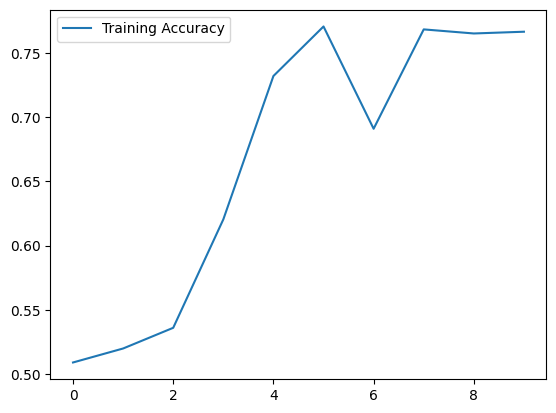

In [101]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.legend()
plt.show()

In [102]:
 # import the test dataset
dataset_test = tf.keras.preprocessing.image_dataset_from_directory(
    './KDEF/KDEF/Test',
    shuffle=True,
    batch_size=32,
)

# Evaluate the model
test_loss, test_acc = model.evaluate(dataset_test)
print(f'The test accuracy is: {test_acc} and the test loss is: {test_loss}')

Found 1891 files belonging to 2 classes.
60/60 ━━━━━━━━━━━━━━━━━━━━ 9s 148ms/step - accuracy: 0.8929 - loss: 0.2730
The test accuracy is: 0.8952934741973877 and the test loss is: 0.27525267004966736


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


2025-01-22 00:06:40.627897: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


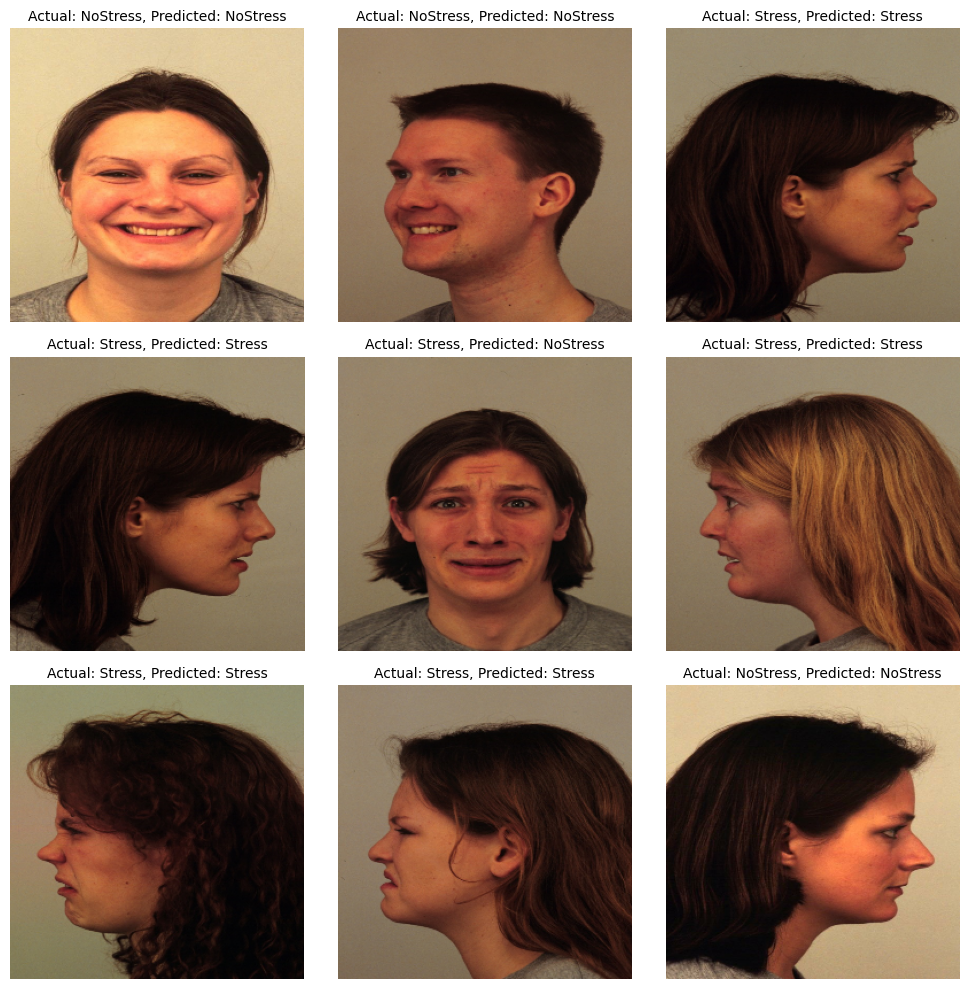

In [103]:
# Visualize the predicted types vs actual types
plt.figure(figsize=(10, 10))

prediction_dataset = dataset_test.skip(5).take(1)

for image, label in prediction_dataset:
    labels = label.numpy()
    predictions = model.predict(image)

    batch_size = image.shape[0]
    for i in range(min(batch_size, 9)):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(image[i].numpy().astype("uint8"))
        predicted_label = np.argmax(predictions[i])
        actual_label = labels[i]
        plt.title(f'Actual: {class_titles[actual_label]}, Predicted: {class_titles[predicted_label]}', fontsize=10)
        plt.axis("off")

plt.tight_layout()
plt.show()
